# Cleaning Top 1000 IMDB movies Kaggele dataset
<br><p>The dataset contains information about movies (name, description, release year, watch time, ...). <br>
My goal is to clean and make visualisation about it </p>

### Importing packages and data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
data = pd.read_csv("Top 1000 IMDB movies (1).csv", index_col=0)
data.sample(10)

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
758,The Great Beauty,(2013),141 min,7.7,86,"34,709",$2.85M,Jep Gambardella has seduced his way through th...
677,Hamlet,(1996),242 min,7.8,****,"34,709",$4.41M,"Hamlet, Prince of Denmark, returns home to fin..."
101,Spider-Man: No Way Home,(2021),148 min,8.3,71,"34,709",$804.75M,"With Spider-Man's identity now revealed, Peter..."
255,Memories of Murder,(2003),132 min,8.1,82,"34,709",$0.01M,"In a small Korean province in 1986, two detect..."
55,Psycho,(1960),109 min,8.5,97,"34,709",$32.00M,"A Phoenix secretary embezzles $40,000 from her..."
103,Like Stars on Earth,(2007),165 min,8.3,****,"34,709",$1.22M,An eight-year-old boy is thought to be a lazy ...
613,Nightcrawler,(2014),117 min,7.8,76,"34,709",$32.38M,"When Louis Bloom, a con man desperate for work..."
315,Nights of Cabiria,(1957),110 min,8.1,****,"34,709",$0.75M,A waifish prostitute wanders the streets of Ro...
796,Black Book,(2006),145 min,7.7,71,"34,709",$4.40M,In the Nazi-occupied Netherlands during World ...
896,Goldfinger,(1964),110 min,7.7,87,"34,709",$51.08M,While investigating a gold magnate's smuggling...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie Name          1000 non-null   object 
 1   Year of Release     1000 non-null   object 
 2   Watch Time          1000 non-null   object 
 3   Movie Rating        1000 non-null   float64
 4   Meatscore of movie  1000 non-null   object 
 5   Votes               1000 non-null   object 
 6   Gross               1000 non-null   object 
 7   Description         1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 70.3+ KB


### Data cleaning
<p> Now I am going to explore data and deal with data cleaning problem<br></p>

#### Year of release column
The column needs to be in a date data type.<br>

In [4]:
symbols=["(", ")", "I", " "]
for symbol in symbols :
    data["Year of Release"]=data["Year of Release"].str.replace(symbol, "", regex=False)
data["Year of Release"] = pd.to_datetime(data["Year of Release"], format="%Y")
data["Year of Release"] = data["Year of Release"].dt.year

In [5]:
year = data["Year of Release"].value_counts()
d = [go.Bar(
        x = year.index, # index = category name
        y = year.values, # value = count
)]
# plotly.offline.iplot(d)

<p> This is an image of the histogram of "Year of Release" column in case it dosen't appear</p>

##### Year of Relase histogram
<img src="newplot.png">

#### Watch time column
The column needs to be in a int data type.<br>

In [6]:
symbols=["m", "i", "n", " "]
for symbol in symbols :
    data["Watch Time"]=data["Watch Time"].str.replace(symbol, "", regex=False)
data["Watch Time"].astype("int")

0      142
1      175
2      152
3      201
4      195
      ... 
995    113
996    118
997     83
998     86
999     71
Name: Watch Time, Length: 1000, dtype: int32

In [7]:
watch = data["Watch Time"].value_counts()
d = [go.Bar(
        x = watch.index, # index = category name
        y = watch.values, # value = count
)]
# plotly.offline.iplot(d)

##### Watch Time histogram
<img src="newplot1.png"><br>
We notice that short films are more present in this data set

#### Meatscore column
The column needs to be in a float data type.<br>

In [8]:
data["Meatscore of movie"]=data["Meatscore of movie"].str.replace("*", "", regex=False)
data["Meatscore of movie"] = data["Meatscore of movie"].apply(lambda x: x.strip()).replace('', np.nan)
data["Meatscore of movie"].value_counts()
data["Meatscore of movie"].astype("float")
print("Missing values :", data["Meatscore of movie"].isna().sum())

Missing values : 164


#### Votes column


In [9]:
data["Votes"].unique()

array(['34,709'], dtype=object)

We have only one unique value.<br>The column has no nead.

In [10]:
data.drop(labels='Votes', axis=1)

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Gross,Description
0,The Shawshank Redemption,1994,142,9.3,81,$28.34M,Two imprisoned men bond over a number of years...
1,The Godfather,1972,175,9.2,100,$134.97M,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,152,9.0,84,$534.86M,When the menace known as the Joker wreaks havo...
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94,$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,Schindler's List,1993,195,9.0,94,$96.90M,"In German-occupied Poland during World War II,..."
...,...,...,...,...,...,...,...
995,Sabrina,1954,113,7.6,72,%^%^%^,A playboy becomes interested in the daughter o...
996,From Here to Eternity,1953,118,7.6,85,$30.50M,"At a U.S. Army base in 1941 Hawaii, a private ..."
997,Snow White and the Seven Dwarfs,1937,83,7.6,95,$184.93M,Exiled into the dangerous forest by her wicked...
998,The 39 Steps,1935,86,7.6,93,%^%^%^,A man in London tries to help a counter-espion...


#### Gross column
The column needs to be in a float data type.<br>
So I will remove symbols and delte inapropriate values and replace them with a NaN value

In [11]:
data["Gross"]=data["Gross"].str.lstrip("%$#^")
data["Gross"]=data["Gross"].str.replace("M", "", regex=False)
data["Gross"] = data["Gross"].apply(lambda x: x.strip()).replace('', np.nan)
print("Missing values :", data["Gross"].isna().sum())

Missing values : 153


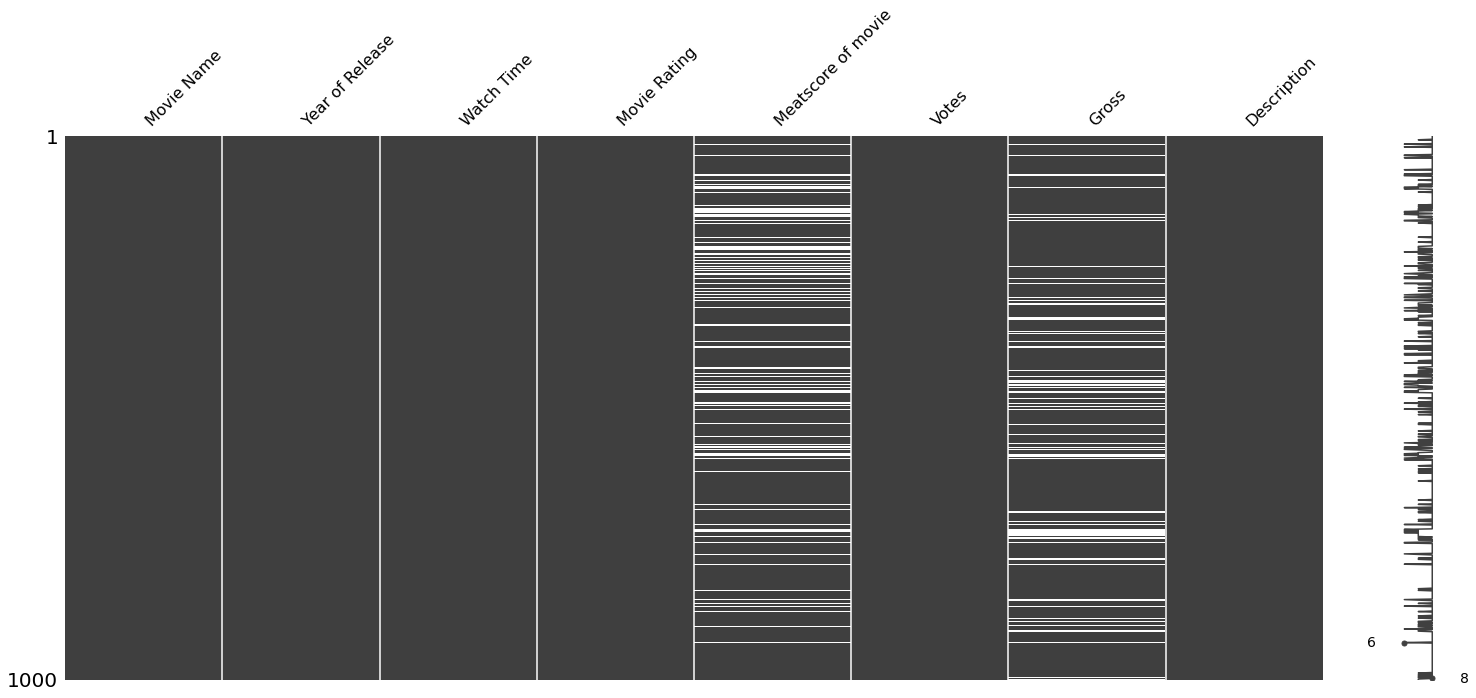

In [12]:
msno.matrix(data)
plt.show()

<AxesSubplot:xlabel='Meatscore of movie', ylabel='Gross'>

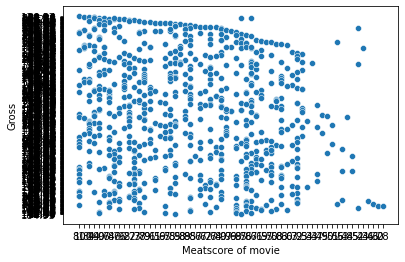

In [13]:
sns.scatterplot(data = data, x="Meatscore of movie", y="Gross")

<p>There is no obvious relation between columns with null values</p><br>

In [14]:
rows_with_both_columns_null = len(data[(data["Gross"].isna()) & (data["Meatscore of movie"].isna())])
rows_with_null = data["Meatscore of movie"].isna().sum() + data["Gross"].isna().sum()
rows_with_one_null = rows_with_null - rows_with_both_columns_null
print("Rows with null values : ", rows_with_null)
print("Rows with only one column null : ", rows_with_one_null)

Rows with null values :  317
Rows with only one column null :  243
